# IA353 - Redes Neurais
# EFC3 - Questão 5

## Autoencoder training and manifold visualization
## Partially based on https://www.kaggle.com/apapiu/manifold-learning-and-autoencoders

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**  Marcelo Eduardo Pederiva

### 5.1. Imports

In [1]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

D:\Anaconda3\envs\tf_gpu_2020\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 5.2. Reading the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [5]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

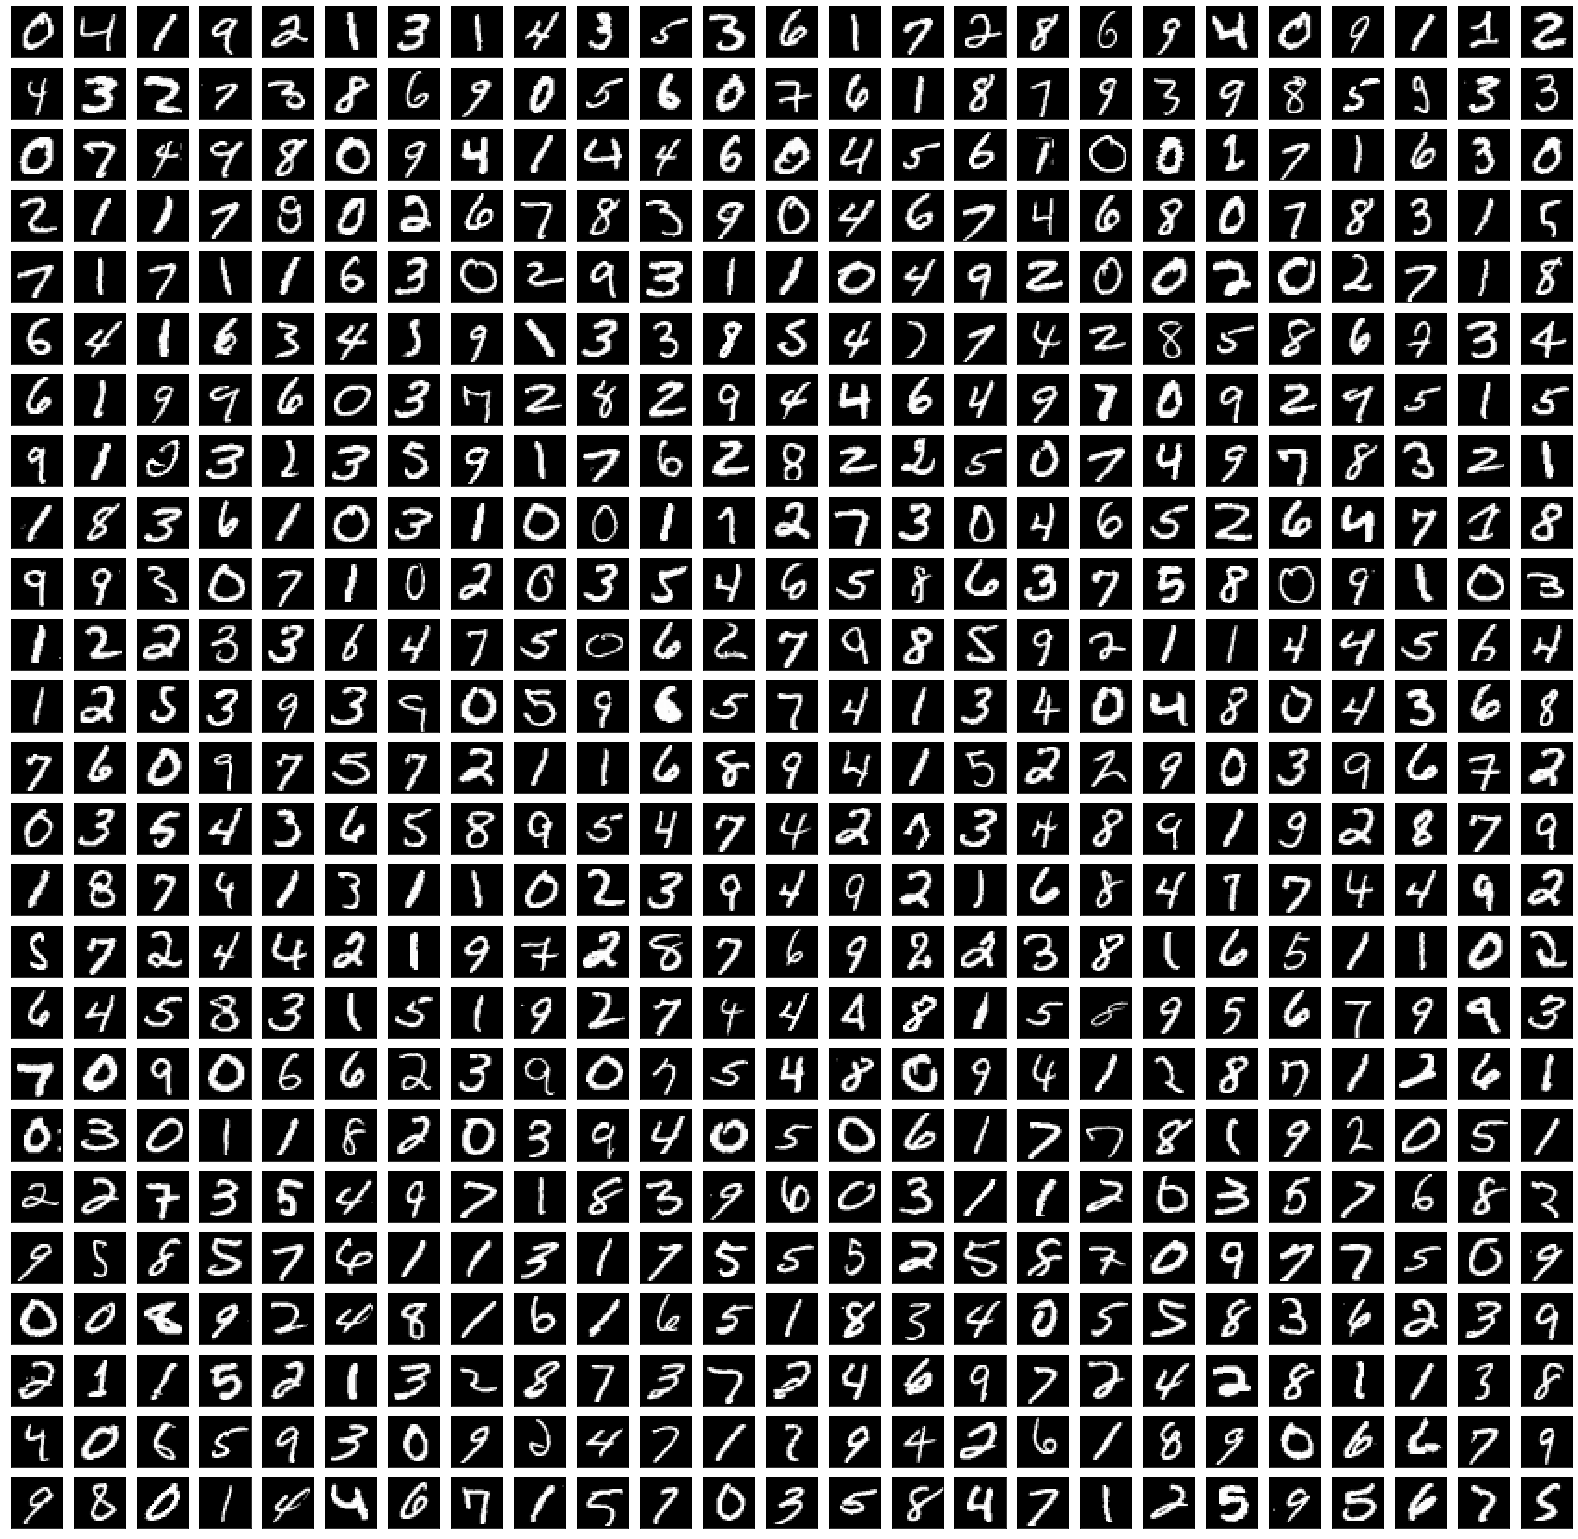

In [6]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(x_images[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### 5.3 Proposal for the autoencoder architecture

Para procurar melhorar o desempenho deste autoencoder, encontrei na literatura um artigo de 2017(https://arxiv.org/abs/1701.04949), onde o autor compara o desempenho de diversas arquiteturas de autoencoder e autoencoder convolucional para a base de dados MNIST.

Dessa forma, buscando utilizar manter o uso do Deep autoencoder ao invés do Convolutional autoencoder, escolhi utilizar o modelo proposto para alcançar um resultado melhor.

No artigo, o autor usa 6000 epochs para o treinamento, para essa atividade utilizarei 500.

In [7]:
input_img = Input(shape=(784,))

encoded = Dense(1000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(250, activation='relu')(encoded)

encoded = Dense(2)(encoded) # Linear activation function at the bottleneck

decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(1000, activation='relu')(decoded)

decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)

In [8]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 502       
_________________________________________________________________
dense_5 (Dense)              (None, 250)               750       
_________________________________________________________________
dense_6 (Dense)              (None, 500)               1255

In [9]:
autoencoder.compile(optimizer = "adam", loss = "mse")
X = x_train.reshape(x_train.shape[0], 784)
history = autoencoder.fit(X, X, batch_size = 256, nb_epoch = 500, verbose = 1)

Epoch 1/500
60000/60000 [==============================] - 3s 49us/step - loss: 0.0634
Epoch 2/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0456
Epoch 3/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0416
Epoch 4/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0397
Epoch 5/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0391
Epoch 6/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0380
Epoch 7/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0377
Epoch 8/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0370
Epoch 9/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0364
Epoch 10/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0362
Epoch 11/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0358
Epoch 12/500
60000/60000 [===============

60000/60000 [==============================] - 2s 40us/step - loss: 0.0288
Epoch 187/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0288
Epoch 188/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0290
Epoch 189/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0290
Epoch 190/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0288
Epoch 191/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0289
Epoch 192/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0290
Epoch 193/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0292
Epoch 194/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0290
Epoch 195/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0290
Epoch 196/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0288
Epoch 197/500
60000/60000 [========

60000/60000 [==============================] - 2s 40us/step - loss: 0.0275
Epoch 370/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 371/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0272
Epoch 372/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0271
Epoch 373/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0272
Epoch 374/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0272
Epoch 375/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0272
Epoch 376/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0271
Epoch 377/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0271
Epoch 378/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 379/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 380/500
60000/60000 [========

60000/60000 [==============================] - 2s 40us/step - loss: 0.0275
Epoch 462/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0276
Epoch 463/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 464/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 465/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0272
Epoch 466/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0271: 0s - los
Epoch 467/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0270
Epoch 468/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0270
Epoch 469/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0271
Epoch 470/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 471/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0273
Epoch 472/500
60000/60000

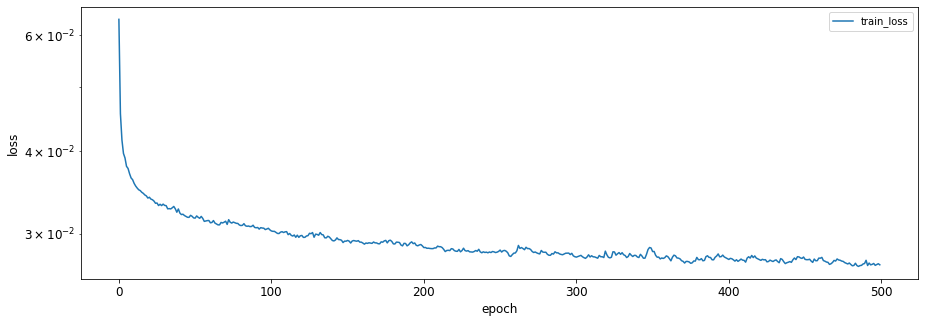

In [10]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

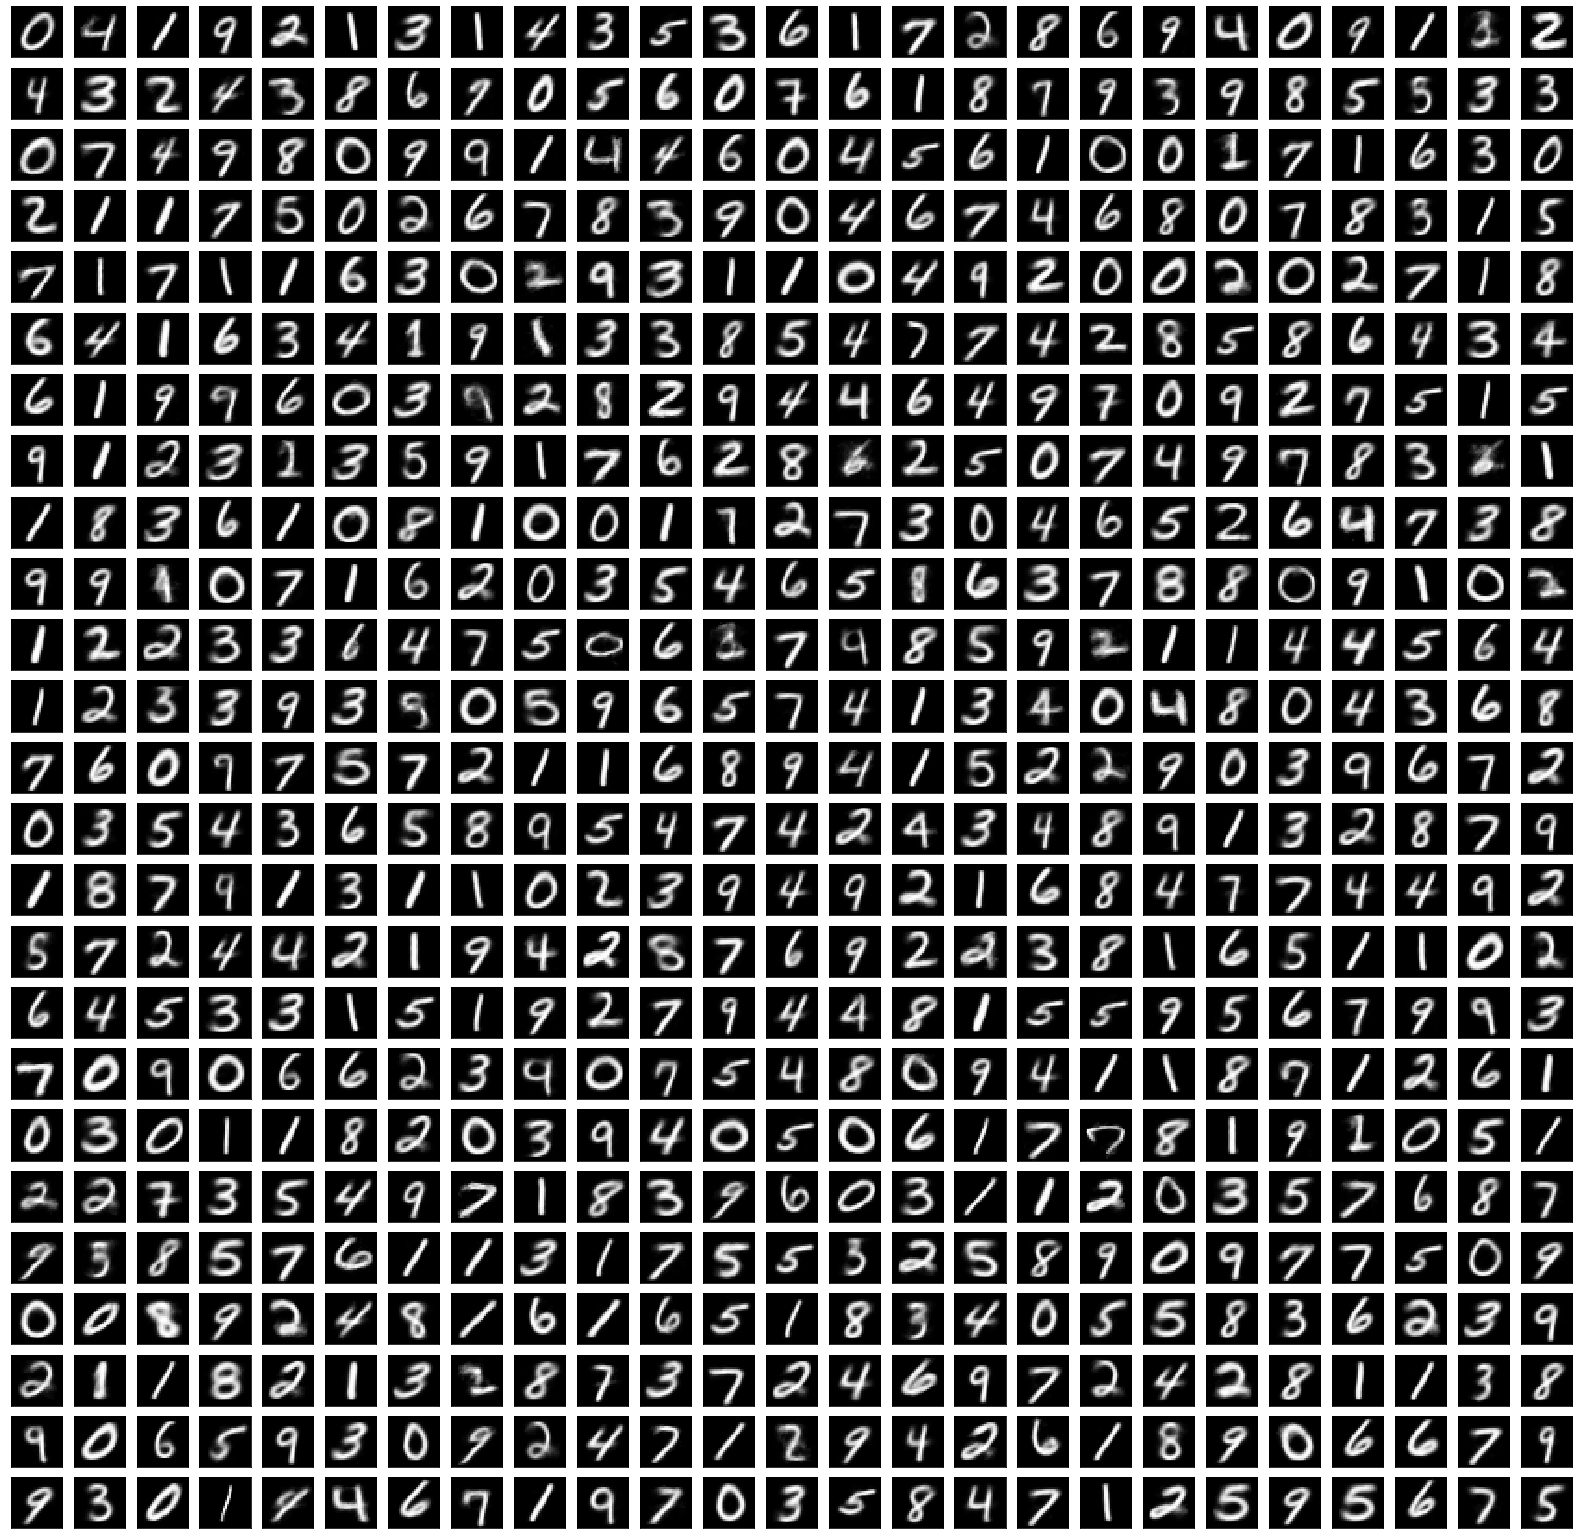

In [11]:
# Visualization of 25 x 25 reconstructed images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(autoencoder.predict(np.expand_dims(x_images[ind].flatten(), 0)).reshape(28, 28))
        plt.xticks([])
        plt.yticks([])
        ind+=1

In [12]:
encoder = Model(input = input_img, output = encoded)

# Building the decoder
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-4]
encoded_layer_2 = autoencoder.layers[-3]
encoded_layer_3 = autoencoder.layers[-2]
encoded_layer_4 = autoencoder.layers[-1]

decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = encoded_layer_3(decoder)
decoder = encoded_layer_4(decoder)
decoder = Model(input=encoded_input, output=decoder)

### 5.4 Visualizing the mapping of the labeled images in the manifold

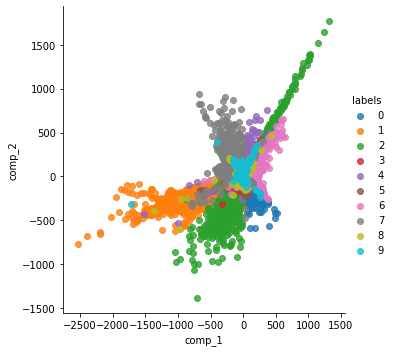

In [15]:
import seaborn as sns

x_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

x_proj = encoder.predict(x_flat[:60000])
x_proj.shape

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:60000]
sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)

### 5.5. Generating new digits by moving along the manifold (latent 2D space)
**Please, adjust the scale whenever necessary.**

### 5.5.1 Moving along a circle

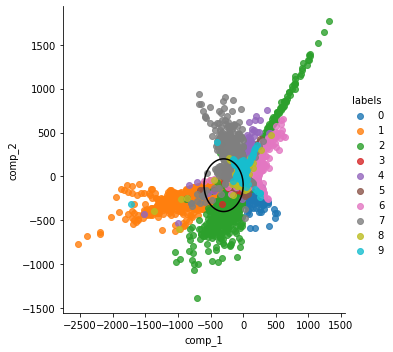

In [32]:
_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [300 * np.cos(2 * np.pi / 100 * i) -300 for i in range(100)]
all_y = [300 * np.sin(2 * np.pi / 100 * i) -100  for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

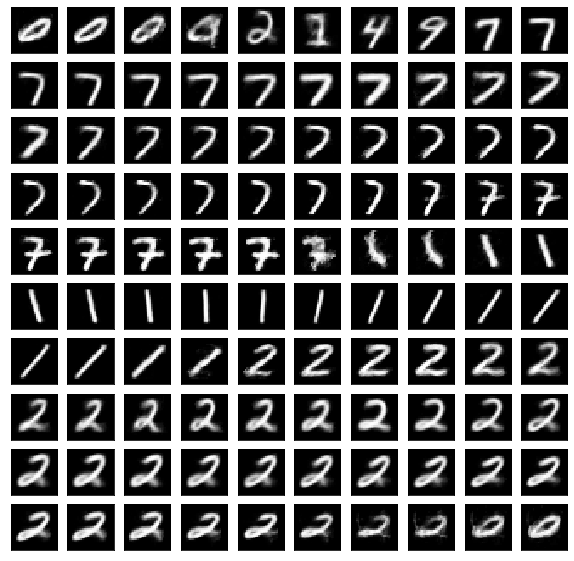

In [33]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 300 * np.cos(2 * np.pi / 100 * i) -300
    y = 300 * np.sin(2 * np.pi / 100 * i) -100 
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### 5.5.2 Moving along an ellipse

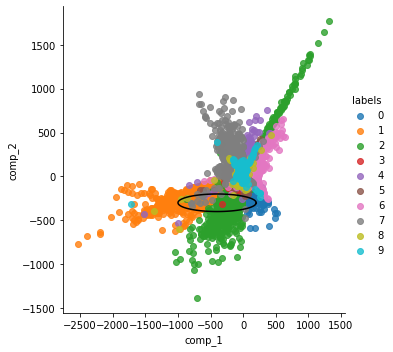

In [36]:
_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [600 * np.cos(2 * np.pi / 100 * i) - 400 for i in range(100)]
all_y = [100 * np.sin(2 * np.pi / 100 * i) - 300 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

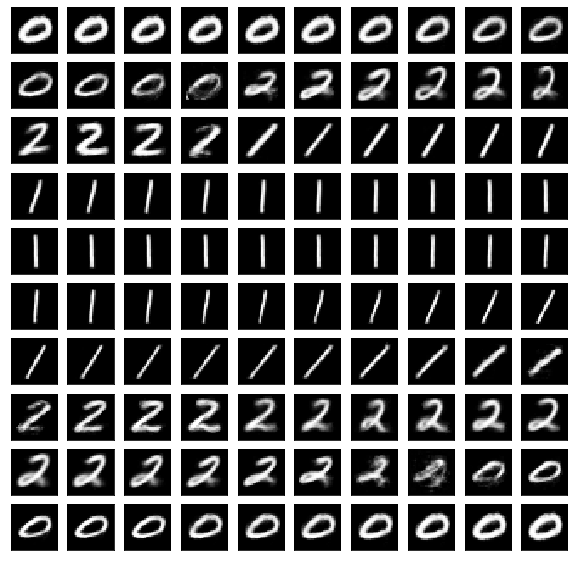

In [37]:
# moving along a elipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 600 * np.cos(2 * np.pi / 100 * i) - 400
    y = 100 * np.sin(2 * np.pi / 100 * i) - 300
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### 5.5.3 Moving along a grid

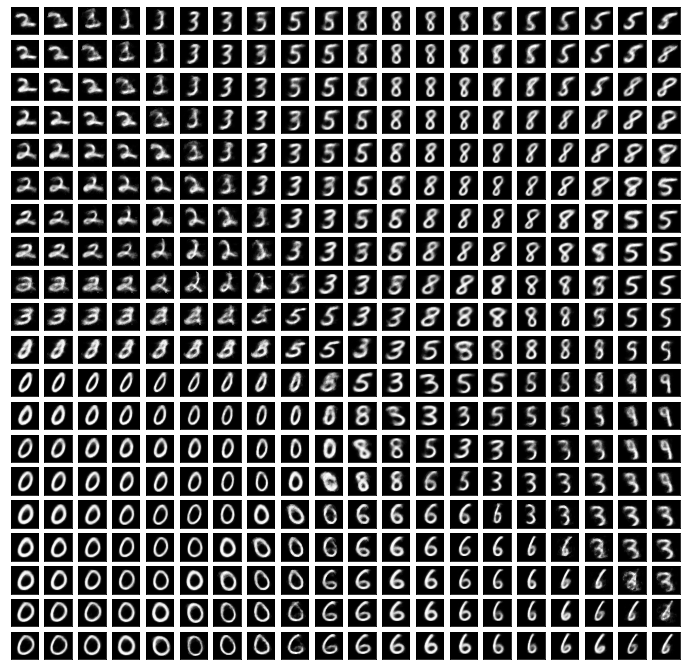

In [39]:
# moving along a elipse:
from PIL import Image, ImageDraw
import PIL


_ = plt.figure(figsize=(12, 12))
savegif = []
for i in range(20):
    for j in range(20):
        
        _ = plt.subplot(20, 20, i * 20 + j + 1)
        pt = np.array([[ -6 + 10 * i / 19, -6 + 10 * j / 19]])
        
        
        savegif.append(decoder.predict(pt).reshape((28, 28)))
        _ = show(decoder.predict(pt).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])

## Gif com a variação dos números

In [43]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
%matplotlib inline
saves =[]
for n in savegif:
    m =Image.fromarray(np.uint8(cm.gist_earth(n)*255))
    saves.append(m)

saves[0].save('manifoldgif.gif',save_all=True, append_images = saves[1:],
             duration=200,
             loop=0)


In [44]:
from IPython.display import Image
from IPython.display import HTML
HTML('<img src="manifoldgif.gif">')